In [1]:
import sys
sys.path.insert(0, '/mnt/c/Users/jiyun/Desktop/Jiyu/2020-2021/Winter/CSC413 - Neural Networks and Deep Learnin/Final Project/Image-Captioning-Reproduction/nearest-neighbor')
from feature_extraction import ImageFeature
from caption_generation import CaptionGenerator

In [2]:
dataDir = '../annotations/annotations_trainval2014'
dataType = 'val2014'
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)

In [3]:
annFile

'../annotations/annotations_trainval2014/annotations/captions_val2014.json'

In [ ]:
capgen = CaptionGenerator(annFile, early_stop=200)

loading annotations into memory...


  0%|          | 0/40504 [00:00<?, ?it/s]

Done (t=0.67s)
creating index...
index created!
Using early stop at 200 images


  0%|          | 26/40504 [00:13<5:34:16,  2.02it/s]

In [2]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
import numpy as np
import random

In [6]:
img_paths = ["/mnt/c/Users/jiyun/Desktop/Jiyu/2020-2021/Winter/CSC413 - Neural Networks and Deep Learnin/Final Project/Image-Captioning-Reproduction/data/val2014/val2014/COCO_val2014_000000000073.jpg",
             "/mnt/c/Users/jiyun/Desktop/Jiyu/2020-2021/Winter/CSC413 - Neural Networks and Deep Learnin/Final Project/Image-Captioning-Reproduction/data/val2014/val2014/COCO_val2014_000000000785.jpg",]

In [9]:
img_feats = np.empty((len(img_paths), 512))
idx = 0
for img_path in img_paths:
    img_feat = ImageFeature(img_path).get_vector()
    img_feats[idx] = img_feat.numpy()
    idx += 1

nearest_neighbors = capgen.get_kneighbors(img_feats)

In [11]:
nearest_neighbors

array([[271177, 268556, 174482, 251252, 549399,  97434, 550529,  15827,
        412151, 321107],
       [394892, 293802, 515289, 369763, 354533,  87038, 440575, 463836,
          1146, 252219]])

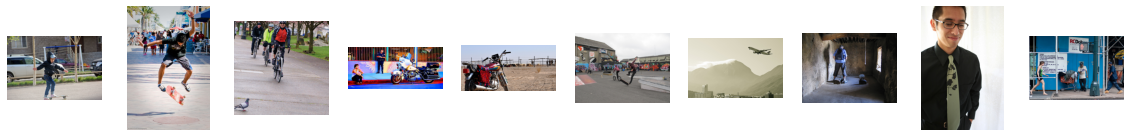

In [19]:
columns = 10
plt.figure(figsize=(20, 5))
idx = 1
for i, img_id in enumerate(nearest_neighbors[idx]):
    url = capgen.coco.imgs[img_id]['coco_url']
    raw_img = Image.open(requests.get(url, stream=True).raw)
    
    plt.subplot(int(len(nearest_neighbors[idx]) / columns + 1), columns, i + 1)
    plt.axis('off')
    plt.imshow(raw_img)

In [27]:
from nltk.translate import bleu_score

In [63]:
best_captions = []
for cluster in nearest_neighbors:
    ann_ids = capgen.coco.getAnnIds(imgIds=cluster)
    ann_ids = [ann_ids[i:i + 5] for i in range(0, len(ann_ids), 5)]
    
    all_captions = []
    for img_caption_ids in ann_ids:
        for caption_id in img_caption_ids:
            all_captions.append(capgen.coco.anns[caption_id]['caption'].split())

    caption_scores = np.zeros(len(all_captions)) 
    for i in range(len(all_captions)):
        references = all_captions.copy()
        hypothesis = references.pop(i)
        caption_scores[i] = bleu_score.sentence_bleu(references, hypothesis)
        
    best_caption = capgen.coco.getAnnIds(imgIds=cluster)[caption_scores.argmax()]
    best_captions.append(capgen.coco.anns[best_caption]['caption'])

In [64]:
best_captions

['A motor bike parked on the side of the street.',
 'a person with a shopping cart on a city street ']

In [62]:
capgen.coco.anns[best_caption]['caption']

'a person with a shopping cart on a city street '

In [48]:
all_captions[45]

['a', 'person', 'with', 'a', 'shopping', 'cart', 'on', 'a', 'city', 'street']

In [99]:
coco.imgToAnns[285][0]['caption']

'A big burly grizzly bear is show with grass in the background.'

In [94]:
sample_imgs = []
for i in range(5):
    sample_imgs.append(random.choice(list(coco.imgs.items()))[1]['coco_url'])

In [95]:
sample_imgs

['http://images.cocodataset.org/val2014/COCO_val2014_000000008180.jpg',
 'http://images.cocodataset.org/val2014/COCO_val2014_000000241453.jpg',
 'http://images.cocodataset.org/val2014/COCO_val2014_000000218093.jpg',
 'http://images.cocodataset.org/val2014/COCO_val2014_000000005569.jpg',
 'http://images.cocodataset.org/val2014/COCO_val2014_000000121143.jpg']

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
dataDir = '../annotations/annotations_trainval2014'
dataType = 'val2014'
ann_file = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
k = 10
capgen = CaptionGenerator(ann_file, k=k, early_stop=50)

# all_imgs = glob.glob(f'../data/{data_type}/{data_type}/*.jpg')
# sample_imgs = all_imgs[-5:]
sample_img_urls = []
sample_img_ids = []
sample_captions = []
for i in range(5):
    cap_id, cap_info = random.choice(list(capgen.coco.anns.items()))
    img_info = capgen.coco.imgs[cap_info['image_id']]
    sample_img_urls.append(img_info['coco_url'])
    sample_img_ids.append(cap_info['image_id'])
    sample_captions.append(cap_info['caption'])
best_captions = capgen.get_captions(sample_img_urls)

loading annotations into memory...


  0%|          | 0/40504 [00:00<?, ?it/s]

Done (t=0.61s)
creating index...
index created!
Using early stop at 50 images


  0%|          | 49/40504 [00:27<6:14:58,  1.80it/s]


In [5]:
best_captions

['A man riding on the back of a motorcycle.',
 'A woman is holding a cat in her kitchen.',
 'a person with a shopping cart on a city street ',
 'A woman is holding a cat in her kitchen.',
 'a person with a shopping cart on a city street ']

***

In [65]:
nearest_neighbors

array([[271177, 268556, 174482, 251252, 549399,  97434, 550529,  15827,
        412151, 321107],
       [394892, 293802, 515289, 369763, 354533,  87038, 440575, 463836,
          1146, 252219]])

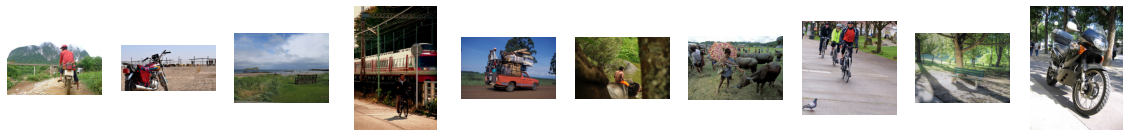

In [11]:
columns = 10
plt.figure(figsize=(20, 5))
for i, img_id in enumerate(nearest_neighbors[0]):
    url = capgen.coco.imgs[img_id]['coco_url']
    raw_img = Image.open(requests.get(url, stream=True).raw)

    plt.subplot(int(len(nearest_neighbors[0]) / columns + 1), columns, i + 1)
    plt.axis('off')
    plt.imshow(raw_img)
plt.savefig("10_closest.png")

In [14]:
nearest_neighbors[0]

array([391895, 354533, 522713, 483108, 372938, 384553, 184613, 515289,
        14869, 271177])

In [21]:
annIds = capgen.coco.getAnnIds(imgIds=nearest_neighbors[0])

In [47]:
annIds = [annIds[i:i + 5] for i in range(0, len(annIds), 5)]

In [67]:
len(annIds)

10

In [53]:
cap_one = [capgen.coco.anns[i]['caption'].split() for i in annIds[1]]
cap_two = [capgen.coco.anns[i]['caption'].split() for i in annIds[2]]

In [54]:
cap_one

[['A',
  'motorcycle',
  'sits',
  'parked',
  'across',
  'from',
  'a',
  'herd',
  'of',
  'livestock.'],
 ['A', 'motorbike,', 'people', 'and', 'sheep', 'in', 'the', 'background'],
 ['A', 'motorcycle', 'parked', 'on', 'top', 'of', 'a', 'sandy', 'beach.'],
 ['A',
  'motorcycle',
  'in',
  'the',
  'foreground',
  'parked',
  'in',
  'a',
  'dirt',
  'parking',
  'lot'],
 ['A',
  'multicolored',
  'motorcycle',
  'rests',
  'outside',
  'of',
  'a',
  'sheep',
  'farm.']]

In [26]:
from nltk.translate import bleu_score

In [57]:
cap_two[0]

['a',
 'bench',
 'sitting',
 'in',
 'the',
 'grass',
 'facing',
 'the',
 'water',
 'and',
 'boats']

In [59]:
bleu_score.sentence_bleu(cap_one, cap_two[0])

6.513869329968086e-155

In [60]:
test = [1,2,3,4]
test.argmax()

AttributeError: 'list' object has no attribute 'argmax'

In [62]:
import numpy as np

In [66]:
np.zeros(5)

array([0., 0., 0., 0., 0.])